In [235]:
from simulate import *

from datetime import datetime
from os import getcwd, makedirs, path
from shutil import copyfile
from time import time
from PIL import Image

from IPython.display import HTML


# Image preprocessing
binary_threshold = 10

# Connected components
connection_radius = 2

# Latice and region creation
lattice_radius = 25
lattice_stride = 25
min_component_size = 2

# Simulation
num_free_cells = 150
neighborhood = 4
max_iterations = 10
num_simulations = 100

# Meta
verbose = True

image = Image.open("images/binary.jpg")
# image = Image.open("images/Cap-3-20x-vessels-blackandwhite.tif")
# image = Image.open("images/Cap-2-vessels-blackandwhite-40X.tif")
# image = Image.open("images/Art-8-vessels-blackandwhite 20x.tif")
# image = Image.open("images/Cap-2-binarized.tif")

%matplotlib inline

In [236]:
new_dirname = path.join(getcwd(), datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
makedirs(new_dirname)

# Copy the configuration file to the directory so that we can see
# the values that generated the outputs
copyfile("./configuration.py", path.join(new_dirname, "configuration.py"))

# Force the image to be square
# TODO: ask Ryan if we can expect most images to be about 512x512
square_image = image.resize((512, 512))

start = time()
binary_image = binarize_and_threshold_image(square_image, binary_threshold)
if verbose:
    print(binary_image.shape, binary_image.dtype)
    print(f"Time to binarize the input image: {time() - start:0.3f}s\n")

start = time()
adj_list = create_matrix_from_adjacency_list(binary_image, connection_radius)
if verbose:
    print("Number of vertices in graph:", len(adj_list))
    print(f"Time to create graph: {time() - start:0.3f}s\n")

start = time()
components = find_connected_compnents(adj_list)
num_components = len(components)
if verbose:
    print("Number of components:", num_components)
    print(f"Time to compute connected components: {time() - start:0.3f}s\n")

start = time()
lattice = create_lattice_of_component_counts(
    binary_image.shape,
    lattice_radius,
    lattice_stride,
    components,
    min_component_size,
)
if verbose:
    print(f"Time to create lattice: {time() - start:0.3f}s\n")

start = time()
brightness = get_brightnesses_from_image(square_image, lattice_stride)
regions = compute_region_scores(lattice, brightness)
if verbose:
    print(f"Time to create regions: {time() - start:0.3f}s\n")

final_panes, animation_data = run_animations(
    regions,
    neighborhood,
    max_iterations,
    num_simulations,
    num_free_cells,
)

(512, 512) uint8
Time to binarize the input image: 0.001s

Number of vertices in graph: 262144
Time to create graph: 20.733s

Number of components: 446
Time to compute connected components: 1.120s

Time to create lattice: 1.936s

Time to create regions: 0.005s



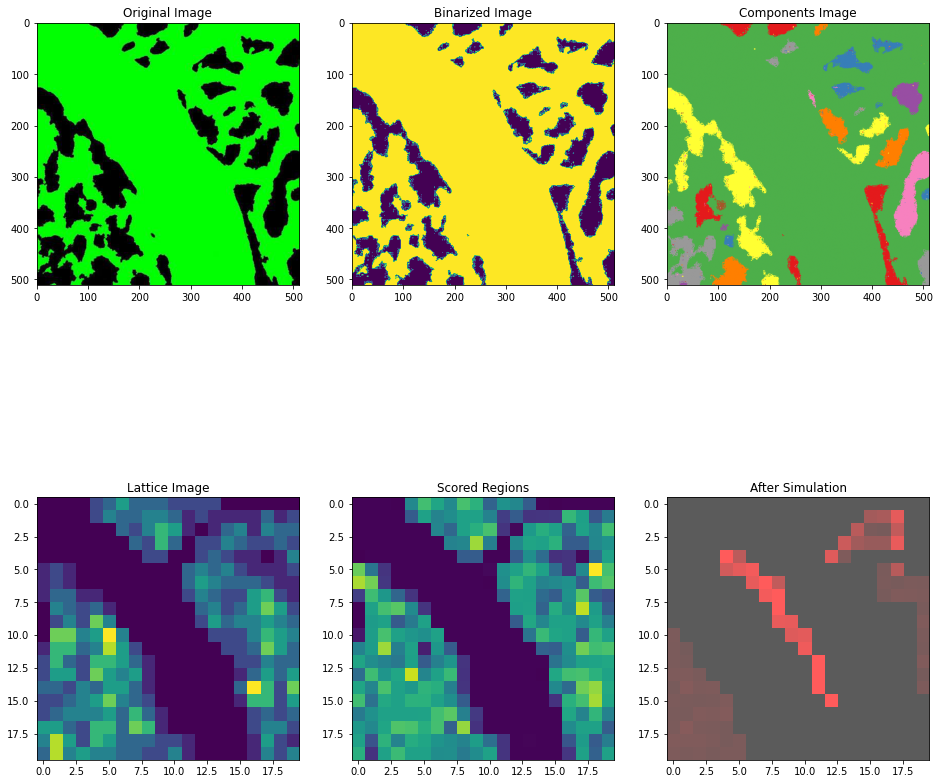

In [237]:
plot_figures(
    components,
    square_image,
    final_panes,
    binary_image,
    lattice,
    regions,
    new_dirname,
)

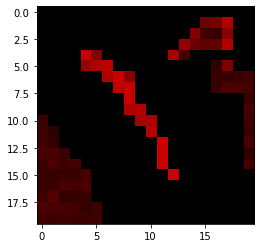

In [238]:
animation = generate_animation_image(animation_data, new_dirname);

In [239]:
HTML(animation.to_jshtml())

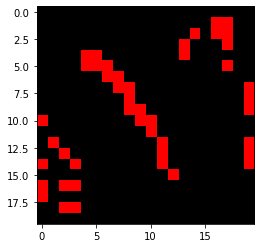

In [240]:
# Single animation
animation = generate_animation_image([animation_data[0]], new_dirname);

In [213]:
HTML(animation.to_jshtml())

In [149]:
%load_ext autoreload
%autoreload 2
%precision 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'%.3f'

In [205]:
grid, animation = animate_cells(num_free_cells, regions, max_iterations, neighborhood)

8 7 0.9868850156341633 -2.1449366083642776
17 19 -18.043128297830773 -15.015011237052969
4 1 -15.988353771741261 32.819700263826476
10 17 30.077630325385982 -19.241239373656448
17 9 -9.316423807895259 -0.7493862370529615
14 6 -5.369601328903655 -7.790780120187615
17 4 -10.701924956028927 -1.4293409224154796
15 18 -26.842528581199936 -15.297687243502061
8 11 33.305504323822575 -15.608465042993947
15 7 -3.3882462868868504 -7.013740961500886
16 9 -10.888368428766864 4.405813342778973
2 2 11.69647742818058 16.23981642075436
3 9 14.092082763337897 -13.760769860269706
13 11 -35.848730335157335 14.510293506937666
3 8 18.327972322649998 -17.419542090091866
14 15 -43.14236552179013 9.33012812683213
10 15 36.3293708471761 -10.61068802521009
0 15 1.7595026382646106 -0.11969598886066202
16 1 -0.09619589114715754 6.300359097127228
4 17 -3.7678266073871405 2.2794881033808845
5 3 -19.58845514950167 31.093243111197978
0 15 1.7595026382646106 -0.11969598886066202
4 14 1.8144298417041231 -7.057898304670

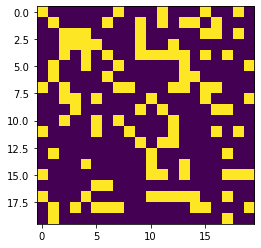

In [206]:
plt.imshow(grid);

In [241]:
neighborhood = 3

xcell, ycell = 10, 10
width, height = 20, 20

xoffmin = -min(xcell, neighborhood)
xoffmax = min(width - 1 - xcell, neighborhood)

yoffmin = -min(ycell, neighborhood)
yoffmax = min(height - 1 - ycell, neighborhood)

xoffsets = range(xoffmin, xoffmax + 1)
yoffsets = range(yoffmin, yoffmax + 1)
xs, ys = np.meshgrid(xoffsets, yoffsets)
xs, ys

(array([[-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3]]),
 array([[-3, -3, -3, -3, -3, -3, -3],
        [-2, -2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3]]))

In [242]:
size = neighborhood * 2 + 1
data = np.random.rand(size, size) * 2 - 1
# data[:, :neighborhood] = 1
# data[:, neighborhood+1:] = -1
# # data[-3:, -3:] = -1
data

array([[ 0.454,  0.453, -0.365, -0.838, -0.577,  0.414,  0.172],
       [-0.735,  0.038, -0.945, -0.3  ,  0.486,  0.884, -0.127],
       [ 0.999, -0.212, -0.202,  0.516, -0.975,  0.546, -0.983],
       [ 0.803, -0.486, -0.678,  0.243, -0.798,  0.207,  0.909],
       [ 0.397,  0.819, -0.118, -0.059, -0.728,  0.831,  0.335],
       [-0.076, -0.386,  0.304,  0.989,  0.349, -0.129,  0.487],
       [ 0.155,  0.134,  0.634,  0.577, -0.19 , -0.15 , -0.603]])

In [243]:
xpull = xs*data
ypull = ys*data
xpull, ypull

(array([[-1.362, -0.906,  0.365, -0.   , -0.577,  0.827,  0.515],
        [ 2.206, -0.076,  0.945, -0.   ,  0.486,  1.769, -0.381],
        [-2.997,  0.425,  0.202,  0.   , -0.975,  1.091, -2.949],
        [-2.409,  0.972,  0.678,  0.   , -0.798,  0.414,  2.728],
        [-1.192, -1.638,  0.118, -0.   , -0.728,  1.662,  1.005],
        [ 0.228,  0.771, -0.304,  0.   ,  0.349, -0.259,  1.462],
        [-0.466, -0.269, -0.634,  0.   , -0.19 , -0.3  , -1.81 ]]),
 array([[-1.362, -1.359,  1.096,  2.515,  1.73 , -1.241, -0.515],
        [ 1.47 , -0.076,  1.89 ,  0.6  , -0.972, -1.769,  0.254],
        [-0.999,  0.212,  0.202, -0.516,  0.975, -0.546,  0.983],
        [ 0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ],
        [ 0.397,  0.819, -0.118, -0.059, -0.728,  0.831,  0.335],
        [-0.152, -0.771,  0.608,  1.977,  0.698, -0.259,  0.975],
        [ 0.466,  0.403,  1.903,  1.731, -0.57 , -0.45 , -1.81 ]]))

In [191]:
xpull.sum(), ypull.sum()

(-84.0, 4.67749042504893)